<a href="https://colab.research.google.com/github/Sandwhaletree/2023.05_Tibame/blob/main/%E9%80%B2%E9%9A%8EDL_%E6%9D%8E%E6%99%BA%E6%8F%9A_Class/002_PyTorch_Tensor_0713.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch #深度學習函式庫，針對強大的n維張量對象（類似於numpy的ndarrays）並且可以在GPU上運算
import numpy as np

# torch.Tensor 多維矩陣(基本數據結構)

A multi-dimensional matrix containing elements of a single data type.

#### Tensor Initialization

#### torch.tensor()
* 將PYTHON LIST與NUMPY表格轉為torch可以用的資料

In [22]:
# from python list #將python list資料轉為torch
a=torch.tensor([
    [1., -1.],
    [1., -1.]
])
a
print(a.type())

torch.FloatTensor


In [24]:
# from numpy.ndarray #將numpy.ndarray直接轉成張量
a = np.array([
    [1, 2, 3],
    [4, 5, 6],
])
b=torch.tensor(a)
print(b.type())

torch.LongTensor


In [27]:
#將numpy.ndarray直接轉成張量
a = np.array([
    [1, 2, 3],
    [4, 5, 6],
])
b=torch.from_numpy(a)
print(b.type())

torch.LongTensor


In [31]:
#將張量直接轉成numpy.ndarray
a=torch.tensor([[1., -1.]])
b=a.numpy()
print(b.dtype)

float32


##### torch.tensor()練習

In [15]:
# 0 維 tensor (scalar)
d0=torch.tensor(1)
d0
print(d0.shape)
print(d0.type())

torch.Size([])
torch.LongTensor


In [16]:
# 0 維 tensor (scalar)
d0=torch.tensor(1, dtype=torch.int16)
d0
print(d0.shape)
print(d0.type())

torch.Size([])
torch.ShortTensor


In [17]:
# 1 維 tensor
d1=torch.tensor([1,2,3], dtype=torch.float32)
d1
print(d1.shape)
print(d1.type())

torch.Size([3])
torch.FloatTensor


In [18]:
#2 維 tensor
d2 = torch.tensor([[1.,2],[3,4]])
print(d2.shape)
print(d2.type())
print(d2)

torch.Size([2, 2])
torch.FloatTensor
tensor([[1., 2.],
        [3., 4.]])


In [20]:
#3維tensor (n-dimensional array)
d3 = torch.tensor([[[1, 2, 3], [3, 4, 5]],
									 [[5, 6, 7], [7, 8 ,9]]])
print(d3.shape)
print(d3.type())
print(d3)

torch.Size([2, 2, 3])
torch.LongTensor
tensor([[[1, 2, 3],
         [3, 4, 5]],

        [[5, 6, 7],
         [7, 8, 9]]])


#### torch tensor dtype (data type) 資料形態(可指定或轉換)
* 資料形態有時可以混用，有時卻不可以

**Float浮點數**

32-bit floating point: **torch.float**, torch.float32(常見)

16-bit floating point: **torch.half**, torch.float16

64-bit floating point: **torch.double**, torch.float64

**Integer整數**

32-bit integer (signed): torch.int32, **torch.int**(常見)

64-bit integer (signed): torch.int64, **torch.long**(常見)

8-bit integer (unsigned): torch.uint8

8-bit integer (signed): torch.int8

16-bit integer (signed): torch.int16, torch.short

**Others其他**

Boolean: torch.bool

In [ ]:
#判斷資料型態
a = torch.tensor([
    [1., -1.],
    [1., -1.]
])

print(a.dtype)
print(a)

torch.float32
tensor([[ 1., -1.],
        [ 1., -1.]])


In [ ]:
#強制轉換為整數int
a = torch.tensor([
    [1., -1.],
    [1., -1.]
], dtype=torch.int)

print(a)

tensor([[ 1, -1],
        [ 1, -1]], dtype=torch.int32)


In [13]:
#強制轉換為布林
a = torch.tensor([
    [1., 0.],
    [1., 0.]
], dtype=torch.bool)

print(a)
print(a.dtype)

tensor([[ True, False],
        [ True, False]])
torch.bool


#### torch.Tensor device 你可以決定要在哪個裝上使用 torch.Tensor

**'cpu'**: CPU only

**'cuda'**: GPU

In [ ]:
#指定再哪個設備運行tensor
print(torch.device('cuda:0')) #顯示卡看你用哪一個
print(torch.device('cuda'))  # current cuda device(一般使用這個)
print(torch.device('cpu')) #預設的cpu

cuda:0
cuda
cpu


In [ ]:
#你現在有沒有用GPU?
print("With GPU? :", torch.cuda.is_available())

With GPU? : False


In [ ]:
#如果你有gpu，就使用gpu，否則使用cpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('current device: ', device)

current device:  cpu


#### Change tensor dtype and device 轉換資料型態或轉換至裝置

.to(dtype)

.to(device)

In [ ]:
# dtype 資料型態轉換
a = torch.tensor([
    [1., -1.],
    [1., -1.]
])
b = a.to(torch.int) #轉換方法1
c = a.int() #轉換方法2

print(a.dtype)
print(b.dtype)
print(c.dtype)

torch.float32
torch.int32
torch.int32


In [ ]:
# device 裝置在CPU上面，現在你突然有GPU，
a = torch.tensor([
    [1., -1.],
    [1., -1.]
])
print(a.device) #原本模型位置cpu

if torch.cuda.is_available():
    b = a.to("cuda")
    print(b.device) #般移後，模型現在位置在cuda:0

cpu


In [ ]:
c = a.to(device)
c.device

device(type='cpu')

In [ ]:
# c = a.cuda()
# d = a.cpu() #這樣寫死，之後要改會很難改

RuntimeError: ignored

#### torch.Tensor.**item()** ;Tensor為高維度值

get a Python number from a tensor containing a single value: 將tensor直接轉換成單一數值(tensor僅能有1個值，否則轉換會炸裂)

In [ ]:
x = torch.tensor([[1]])
print(x.item())

x = torch.tensor(2.5)
print(x.item())

1
2.5


#### torch.Tensor.**numpy()** tensor轉numpy

convert torch.Tensor to numpy array

In [ ]:
x = torch.tensor([[1]]) #只能有一個參數，兩個參數就不能轉換
print(type(x))

y = x.numpy()
print(type(y))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


#### torch.Tensor.**shape**, **.size()**

In [ ]:
a = torch.tensor([
    [1., -1., 1.],
    [1., -1., 1.]
])

print(a.shape) #shpae如果錯，整個模型運行就有問題；一定要對***
print(a.size())

print(a.dim()) #N-Dim矩陣；幾D矩陣，1D、2D、3D

torch.Size([2, 3])
torch.Size([2, 3])
2


#### Reshape tensor

torch.Tensor.**reshape(), view()**

In [ ]:
a = torch.tensor([
    [0, 1, 2],
    [3, 4, 5]
])
print('a: ',a.shape)

b = a.reshape(3, 2)
print('b: ',b.shape)

c = a.view(3, 2)
print('c: ',c.shape)

d = a.reshape(-1, 2) #-1=自動計算大小
print('d: ',d.shape)

a:  torch.Size([2, 3])
b:  torch.Size([3, 2])
c:  torch.Size([3, 2])
d:  torch.Size([3, 2])


In [42]:
a=torch.rand(32,32,3)
b=a.view(1,-1)
print('b: ',b.shape)

b:  torch.Size([1, 3072])


**squeeze(), unsqueeze()**

In [43]:
a = torch.tensor([
    [0, 1, 2],
    [3, 4, 5]
])
print(a.shape)

b = a.reshape(2, 1, 3)
print(b.shape)

c = b.squeeze(dim=2) #將(2, 1, 3)的1擠掉；dim=索引位置
print(c.shape)

d = c.unsqueeze(-1) #將原本的值 1 加回；#擠不掉就會插入原本的值
print(d.shape)

torch.Size([2, 3])
torch.Size([2, 1, 3])
torch.Size([2, 1, 3])
torch.Size([2, 1, 3, 1])


**permute()** 調換dimension的方向

In [40]:
a = torch.tensor([
    [0, 1, 2],
    [3, 4, 5],
    [0, 1, 2],
    [3, 4, 5],
])
print(a.shape)

b = a.reshape(2, 2, 3) # channel last (H, W, C)
print(b.shape)
b

c = b.permute(0, 2, 1)
print("permute(0, 2, 1) -> ", c.shape)

d = b.permute(2, 0, 1)
print("permute(2, 0, 1) -> ", d.shape) # channel first (C, H, W)

torch.Size([4, 3])
torch.Size([2, 2, 3])
permute(0, 2, 1) ->  torch.Size([2, 3, 2])
permute(2, 0, 1) ->  torch.Size([3, 2, 2])


#### More Initialization 初始化方式

In [ ]:
a = torch.ones((2, 4), dtype=torch.int)
a

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1]], dtype=torch.int32)

In [ ]:
a = torch.zeros((2, 4), dtype=torch.int)
a

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)

In [ ]:
# full
a = torch.full((3, 4), 5566.)
a

tensor([[5566., 5566., 5566., 5566.],
        [5566., 5566., 5566., 5566.],
        [5566., 5566., 5566., 5566.]])

In [ ]:
torch.arange(0, 10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Random Initialization 初始化隨機值

In [ ]:
# normal ditribution, mean=0, std=1. #常態分佈 平均值0 標準差1
a = torch.randn((3, 2))
a

tensor([[ 0.8989, -0.3978],
        [ 2.2491, -0.1275],
        [ 1.4074,  0.2818]])

In [ ]:
# normal ditribution
a = torch.normal(mean=0, std=1, size=(3, 2))
a

tensor([[ 1.2317,  0.2220],
        [ 1.0497, -1.0372],
        [-1.9833, -0.1405]])

In [ ]:
# uniform distribution #均勻分布
a = torch.rand((3, 2))
a

tensor([[0.1067, 0.7697],
        [0.7715, 0.6574],
        [0.2926, 0.5659]])

In [ ]:
torch.randint(1, 7, (30,))

tensor([4, 1, 2, 6, 1, 4, 1, 1, 2, 2, 6, 6, 5, 1, 3, 6, 6, 2, 6, 3, 4, 2, 2, 6,
        5, 2, 5, 4, 3, 6])

### Tensor Indexing

In [32]:
# Initialize an example tensor
x = torch.Tensor([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]]
])
x

tensor([[[ 1.,  2.],
         [ 3.,  4.]],

        [[ 5.,  6.],
         [ 7.,  8.]],

        [[ 9., 10.],
         [11., 12.]]])

In [33]:
x.shape

torch.Size([3, 2, 2])

In [ ]:
# Access the 0th element, which is the first row
x[0] # Equivalent to x[0, :]

tensor([[1., 2.],
        [3., 4.]])

In [ ]:
# Get the top left element of each element in our tensor
x[:, 0, 0]

tensor([1., 5., 9.])

In [37]:
#獲取2、4
x[0,:,1]

tensor([2., 4.])

In [ ]:
# use item() to convert to Python scalar
x[0, 0, 0], x[0, 0, 0].item()

(tensor(1.), 1.0)

## Operations

In [4]:
# Create an example tensor
x = torch.ones((3, 2, 2))
x

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])

In [ ]:
# Perform elementwise addition
# Use - for subtraction
x + 5566

tensor([[[5567., 5567.],
         [5567., 5567.]],

        [[5567., 5567.],
         [5567., 5567.]],

        [[5567., 5567.],
         [5567., 5567.]]])

In [5]:
b=torch.add(x,5566)
b

tensor([[[5567., 5567.],
         [5567., 5567.]],

        [[5567., 5567.],
         [5567., 5567.]],

        [[5567., 5567.],
         [5567., 5567.]]])

In [ ]:
# Perform elementwise multiplication
# Use / for division
x * 2

tensor([[[2., 2.],
         [2., 2.]],

        [[2., 2.],
         [2., 2.]],

        [[2., 2.],
         [2., 2.]]])

In [ ]:
# Create a 4x3 tensor of 6s
a = torch.ones((4,3)) * 6
a, a.shape

(tensor([[6., 6., 6.],
         [6., 6., 6.],
         [6., 6., 6.],
         [6., 6., 6.]]),
 torch.Size([4, 3]))

In [ ]:
# Create a 1D tensor of 2s
# b = torch.ones(3) * 2
b = torch.tensor([1, 2, 3])
b, b.shape

(tensor([1, 2, 3]), torch.Size([3]))

In [ ]:
# Broadcasting
# Divide a by b
c = a / b
c, c.shape

(tensor([[6., 3., 2.],
         [6., 3., 2.],
         [6., 3., 2.],
         [6., 3., 2.]]),
 torch.Size([4, 3]))

In [ ]:
# Create an example tensor #平均
m = torch.tensor(
    [
     [1., 1.],
     [2., 2.],
     [3., 3.],
     [4., 4.]
    ]
)
print("shape, ", m.shape)
print(f"Mean: {m.mean()}")
print(f"Mean in the 0th dimension: {m.mean(0)}")
print(f"Mean in the 1st dimension: {m.mean(1)}")

shape,  torch.Size([4, 2])
Mean: 2.5
Mean in the 0th dimension: tensor([2.5000, 2.5000])
Mean in the 1st dimension: tensor([1., 2., 3., 4.])


In [ ]:
# Concatenate in dimension 0 and 1 #想將a、a、a合併
a_cat0 = torch.cat([a, a, a], dim=0)
a_cat1 = torch.cat([a, a, a], dim=1)

print(f"Initial shape: {a.shape}".format())
print(f"Shape after concatenation in dimension 0: {a_cat0.shape}")
print(f"Shape after concatenation in dimension 1: {a_cat1.shape}")

Initial shape: torch.Size([4, 3])
Shape after concatenation in dimension 0: torch.Size([12, 3])
Shape after concatenation in dimension 1: torch.Size([4, 9])


In [3]:
# argmax, argmin
a = torch.randint(0, 10, (4, 4))
print(a)
print(torch.argmax(a, dim=1)) #维度1上找到了矩阵a中每一行的最大值的索引

tensor([[0, 6, 8, 9],
        [1, 1, 4, 4],
        [2, 9, 8, 2],
        [5, 6, 3, 3]])
tensor([3, 2, 1, 1])


In [ ]:
# uniform distribution
a = torch.rand((10, 3))
print(a)
a.argmax(1)

tensor([[0.0131, 0.2912, 0.1800],
        [0.4394, 0.6627, 0.9778],
        [0.8549, 0.4729, 0.9872],
        [0.5639, 0.2293, 0.0747],
        [0.9936, 0.7459, 0.4019],
        [0.5726, 0.2093, 0.3718],
        [0.9569, 0.6959, 0.3107],
        [0.8998, 0.5400, 0.0890],
        [0.8767, 0.9089, 0.7349],
        [0.2001, 0.9365, 0.1644]])


tensor([1, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [7]:
# matplotlib
import matplotlib.pyplot as plt

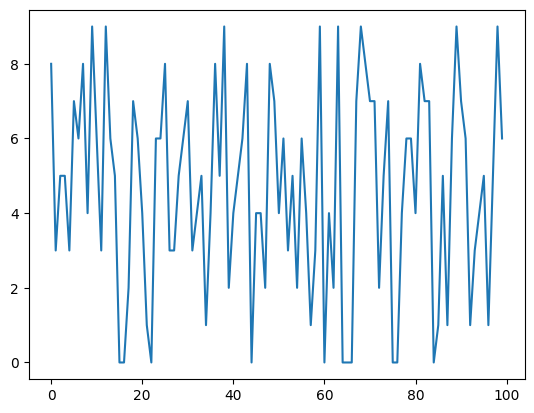

In [ ]:
a = torch.randint(0, 10, (100,))

plt.plot(a.numpy())
#print(a.numpy())

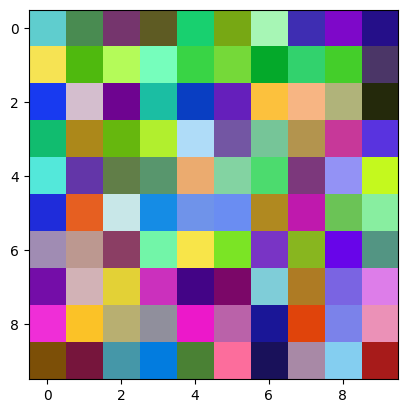

In [9]:
a = torch.randint(0, 256, (10, 10, 3))

plt.imshow(a)